# Aprendizaje Estadístico 2024

## Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import k_means

from sklearn.datasets import load_iris, make_circles, make_moons, make_blobs
from skimage.data import chelsea, coffee

# data visualization
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

from mlxtend.plotting import plot_decision_regions

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# K-means

In [3]:
data = load_iris()

In [4]:
X = data['data']
y = data['target']

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

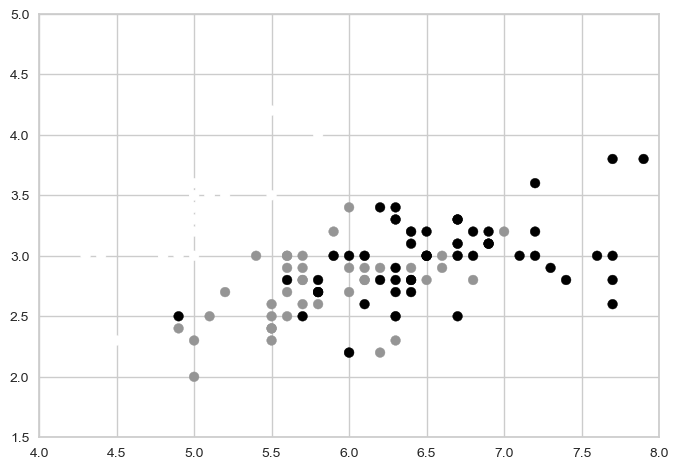

In [6]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [7]:
k = 3
centers, labels, u = k_means(X, n_clusters=k, algorithm='auto', init='random')

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

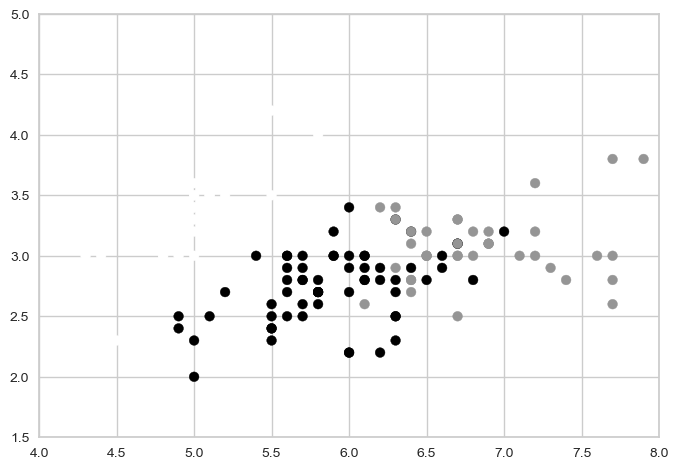

In [9]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

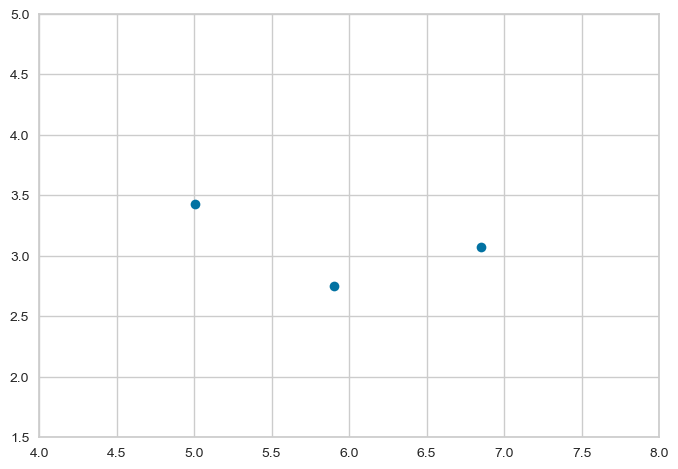

In [10]:
plt.figure()
plt.plot(centers[:,0], centers[:,1], 'o')
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [11]:
labels = ((2 * np.array(labels)) % 3)
print(labels)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
(labels == y).sum() / len(y)

0.8933333333333333

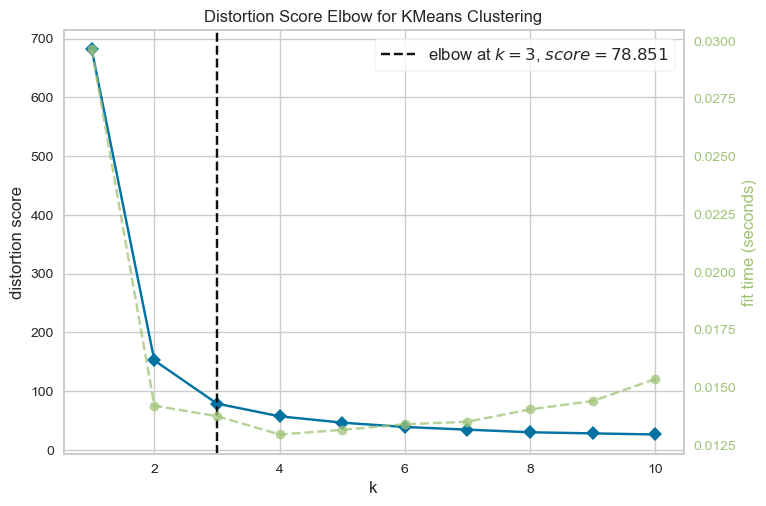

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

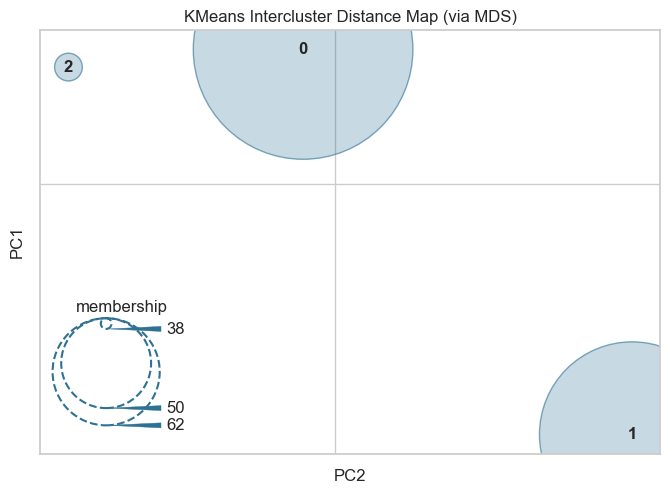

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [14]:
# Instantiate the clustering model and visualizer
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(X)
visualizer.show() 

In [15]:
# Variables a elegir
i = 0
j = 1

In [16]:
# Training a classifier
model = KMeans(3)
model.fit(X[:,[i,j]])

KMeans(n_clusters=3)

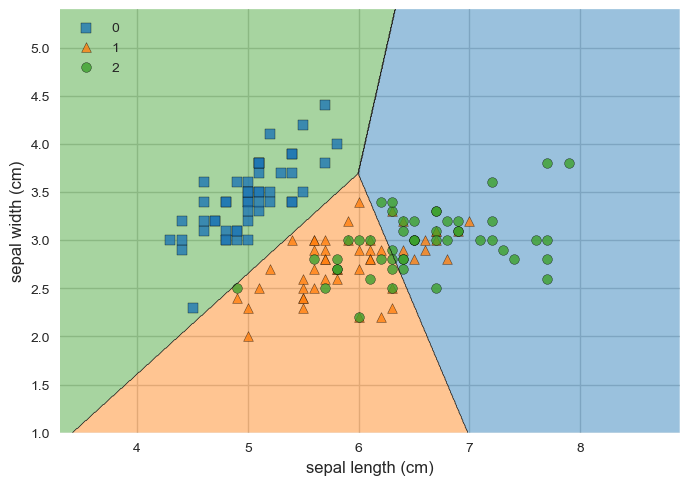

In [17]:
# Plotting decision regions
plot_decision_regions(X[:,[i,j]], y, clf=model, legend=2)

# Adding axes annotations
plt.xlabel(data.feature_names[i])
plt.ylabel(data.feature_names[j])
plt.title('')
plt.show()

In [18]:
distance_measures = {0: 'euclidean', 1: 'squared euclidean', 2: 'manhattan', 3: 'chebyshev', 
                     4: 'minkowski', 5: 'canberra', 6: 'chi-square', 7: 'gower'}

In [19]:
metric = 3

In [20]:
initial_centers = random_center_initializer(X[:,[i,j]], 3, random_state=5).initialize()

In [23]:
instanceKm = kmeans(X[:,[i,j]], initial_centers=initial_centers, metric=distance_metric(metric))

In [24]:
instanceKm.process()

In [25]:
pyClusters = instanceKm.get_clusters()
pyCenters = instanceKm.get_centers()

# enumerate encoding type to index labeling to get labels
pyEncoding = instanceKm.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
pyLabels = pyEncoder.set_encoding(0).get_clusters()    

In [26]:
print(pyLabels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0]


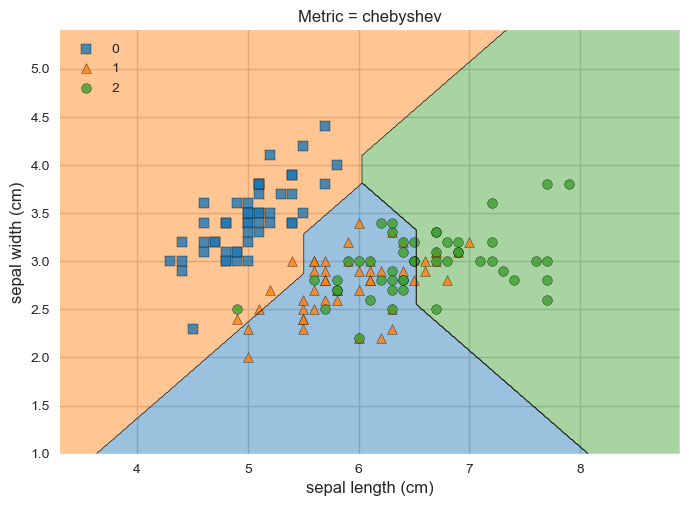

In [27]:
# Plotting decision regions
plot_decision_regions(X[:,[i,j]], y, clf=instanceKm, legend=2)

# Adding axes annotations
plt.xlabel(data.feature_names[i])
plt.ylabel(data.feature_names[j])
plt.title('Metric = {}'.format(distance_measures[metric]))
plt.show()

In [28]:
def KMeans_pyclustering(X, k=2, metric=0):
    initial_centers = random_center_initializer(X, k, random_state=2024).initialize()
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(metric))
    instanceKm.process()
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()    
    return np.array(pyCenters), np.array(pyLabels)

## Image Quantization

In [29]:
I = plt.imread('tree.jpg')

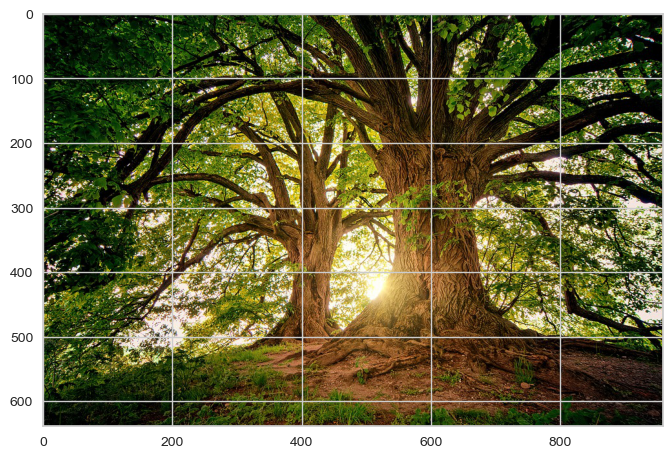

In [30]:
plt.figure()
plt.imshow(I)
plt.show()

In [31]:
sh = I.shape
sh

(639, 960, 3)

In [32]:
I[0,0,:]

array([ 3, 14,  8], dtype=uint8)

In [33]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [34]:
Iflat.shape

(613440, 3)

In [35]:
Iflat[:10]

array([[ 3, 14,  8],
       [ 3, 13,  5],
       [ 7, 15,  2],
       [ 8, 23,  2],
       [ 5, 32,  1],
       [ 3, 41,  2],
       [ 7, 49,  9],
       [20, 54, 21],
       [21, 41, 16],
       [20, 31, 15]], dtype=uint8)

In [36]:
k = 4      # número de clústers

centers0, labels0 = KMeans_pyclustering(Iflat, k, metric=0)
centers2, labels2 = KMeans_pyclustering(Iflat, k, metric=2)
centers3, labels3 = KMeans_pyclustering(Iflat, k, metric=3)
centers4, labels4 = KMeans_pyclustering(Iflat, k, metric=4)
centers5, labels5 = KMeans_pyclustering(Iflat, k, metric=5)

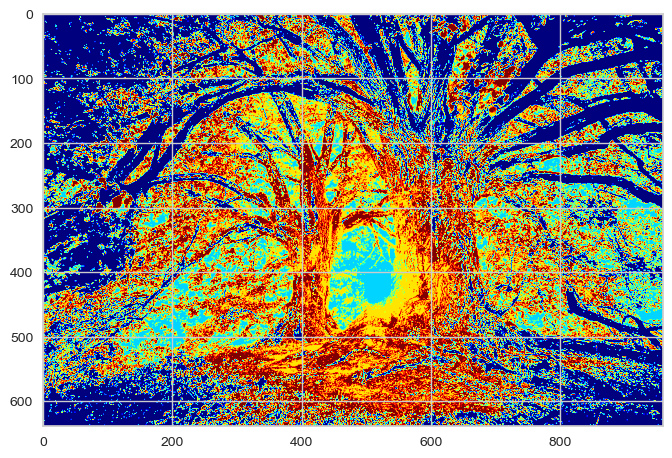

In [37]:
plt.figure()
plt.imshow(labels0.reshape(sh[0], sh[1]), cmap='jet')
plt.show()

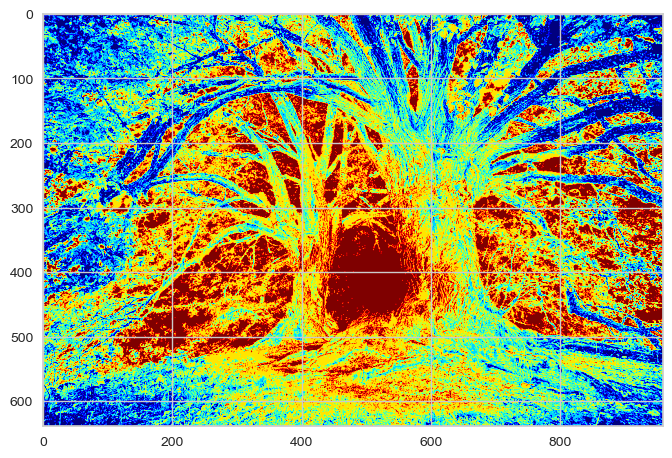

In [38]:
plt.figure()
plt.imshow(labels5.reshape(sh[0], sh[1]), cmap='jet')
plt.show()

In [39]:
result0 = np.zeros(sh).reshape(-1,3)
result2 = np.zeros(sh).reshape(-1,3)
result3 = np.zeros(sh).reshape(-1,3)
result4 = np.zeros(sh).reshape(-1,3)
result5 = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result0[labels0 == i] = centers0[i]
    result2[labels2 == i] = centers2[i]
    result3[labels3 == i] = centers3[i]
    result4[labels4 == i] = centers4[i]
    result5[labels5 == i] = centers5[i]

result0 = result0.reshape(sh).astype(np.uint8)
result2 = result2.reshape(sh).astype(np.uint8)
result3 = result3.reshape(sh).astype(np.uint8)
result4 = result4.reshape(sh).astype(np.uint8)
result5 = result5.reshape(sh).astype(np.uint8)

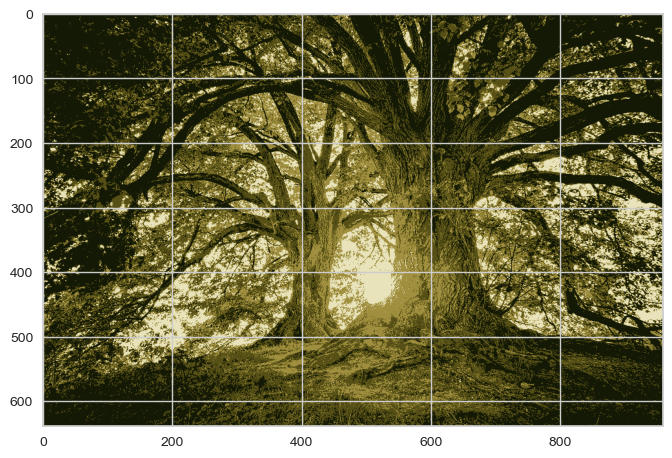

In [40]:
plt.figure()
plt.imshow(result0)
plt.show()

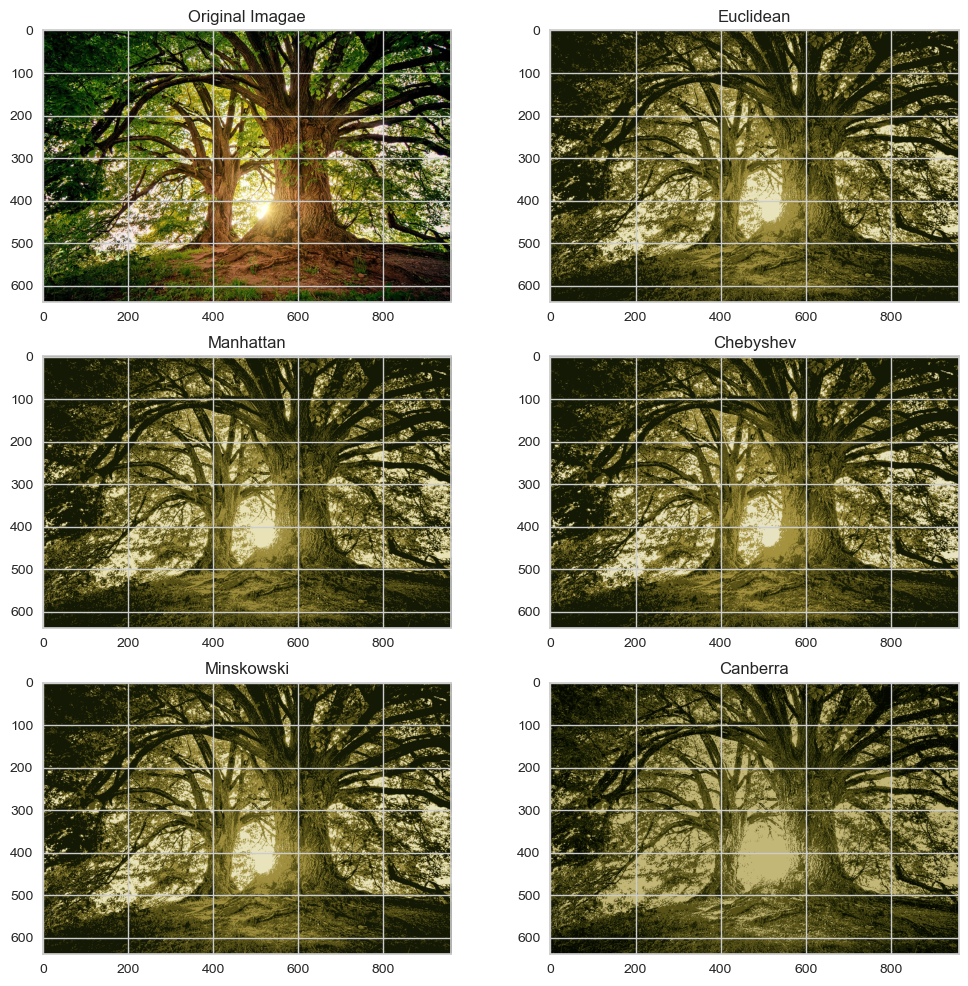

In [41]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.imshow(I)
plt.title('Original Imagae')
plt.subplot(3,2,2)
plt.imshow(result0)
plt.title('Euclidean')
plt.subplot(3,2,3)
plt.imshow(result2)
plt.title('Manhattan')
plt.subplot(3,2,4)
plt.imshow(result3)
plt.title('Chebyshev')
plt.subplot(3,2,5)
plt.imshow(result4)
plt.title('Minskowski')
plt.subplot(3,2,6)
plt.imshow(result5)
plt.title('Canberra')
plt.show()